In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext lab_black

In [2]:
df_vac_unem_by_sector = pd.read_csv("./data/vacancies_unemployed_by_sector.csv")
df_vac_unem_by_sector.dropna(inplace=True)

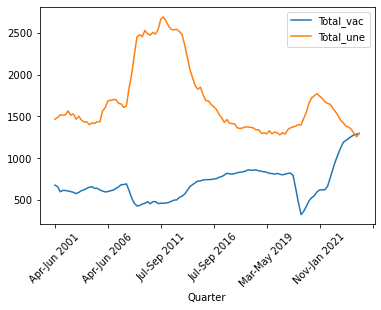

In [3]:
df_vac_unem_by_sector.set_index("Quarter")[["Total_vac", "Total_une"]].dropna().plot(
    rot=45
)
plt.show()

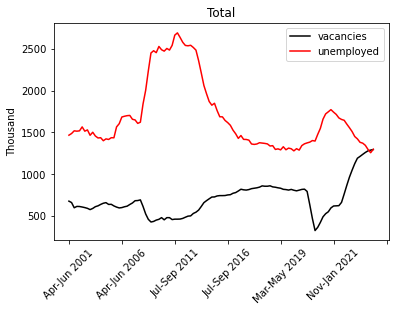

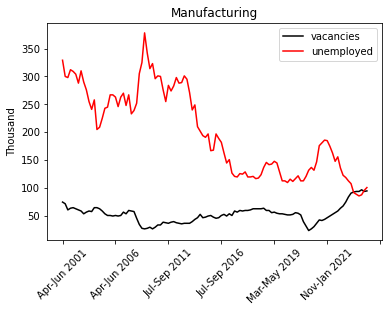

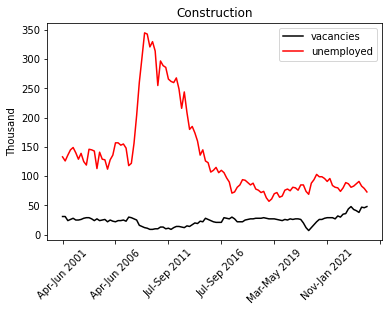

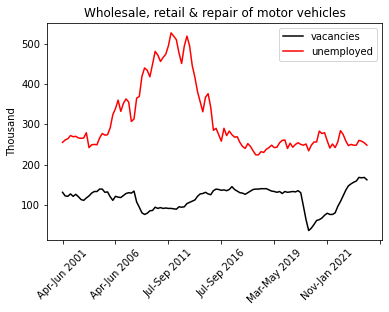

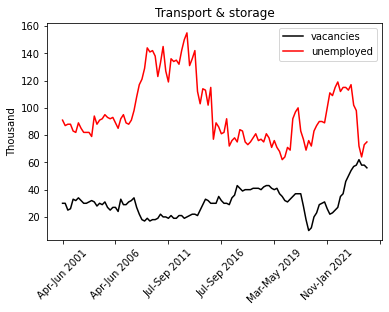

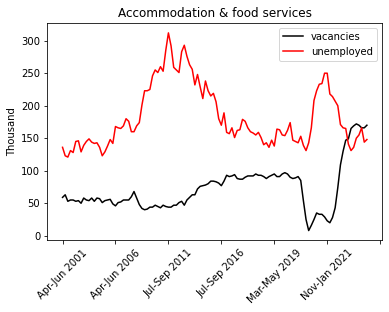

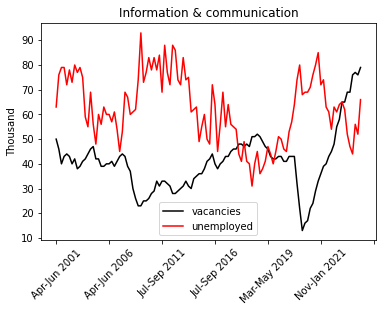

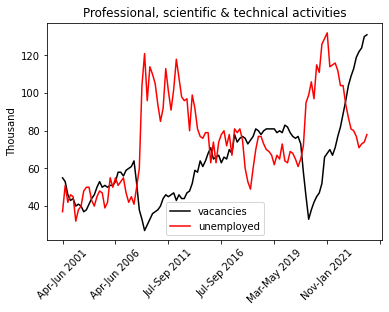

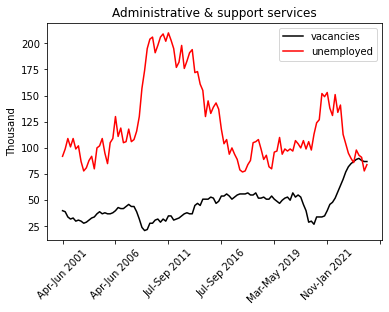

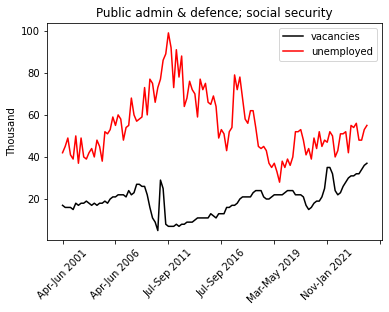

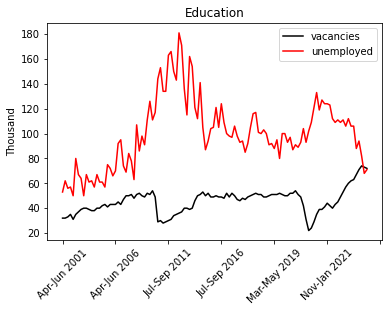

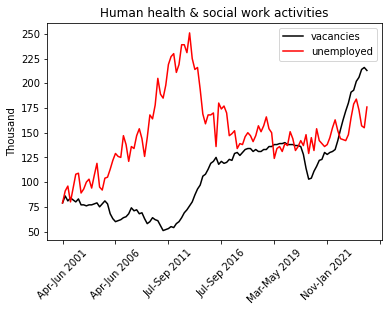

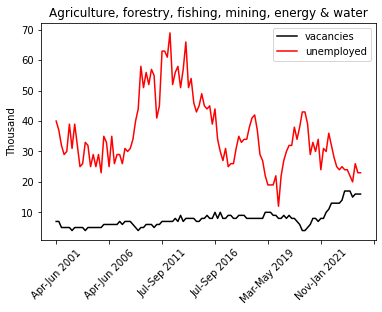

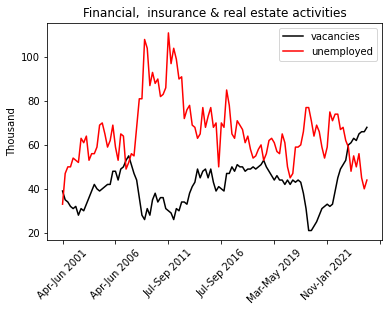

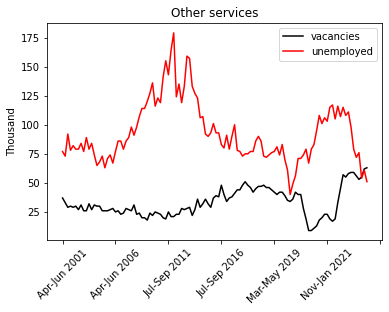

In [4]:
for sector in df_vac_unem_by_sector.drop("Quarter", axis=1).columns[:-15]:
    ax = (
        df_vac_unem_by_sector.set_index("Quarter")[
            [sector[:-4] + "_vac", sector[:-4] + "_une"]
        ]
        .dropna()
        .plot(title=sector[:-4], rot=45, xlabel="", ylabel="Thousand", color=["k", "r"])
    )
    ax.legend(["vacancies", "unemployed"])

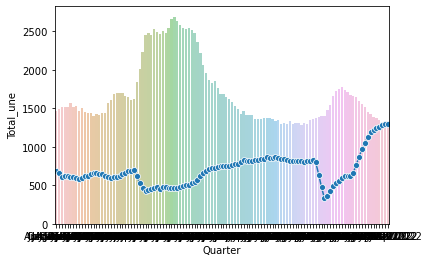

In [5]:
plot_data = df_vac_unem_by_sector[["Quarter", "Total_vac", "Total_une"]].dropna()


sns.lineplot(data=plot_data, x="Quarter", y="Total_vac", marker="o", sort=False)
sns.barplot(data=plot_data, x="Quarter", y="Total_une", alpha=0.5)

plt.show()

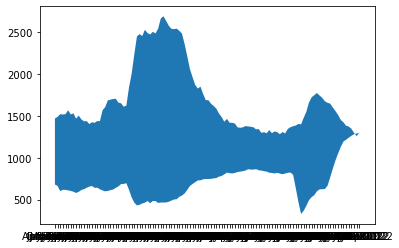

In [6]:
fix, ax = plt.subplots()
ax.fill_between(plot_data.Quarter, plot_data.Total_une, plot_data.Total_vac)
plt.show()

In [7]:
# Make all columns integers
for i in df_vac_unem_by_sector.columns:
    try:
        df_vac_unem_by_sector[[i]] = (
            df_vac_unem_by_sector[[i]].astype(float).astype(int)
        )
    except:
        pass

In [8]:
labels = [
    "vacancies",
    "unemployed",
]
colors = [
    # "rgb(49,130,189)",
    "rgb(247,45,236)",
    "rgb(84,5,149)"
    # "rgb(67,67,67)",
]

mode_size = [8, 12]
line_size = [2, 4]

x_data = pd.concat(
    [df_vac_unem_by_sector.Quarter, df_vac_unem_by_sector.Quarter], axis=1
).values.T

y_data = df_vac_unem_by_sector[["Total_vac", "Total_une"]].values.T

fig = go.Figure()

for i in range(0, 2):
    fig.add_trace(
        go.Scatter(
            x=x_data[i],
            y=y_data[i],
            mode="lines",
            name=labels[i],
            line=dict(color=colors[i], width=line_size[i]),
            connectgaps=True,
        )
    )

    # endpoints
    fig.add_trace(
        go.Scatter(
            x=[x_data[i][0], x_data[i][-1]],
            y=[y_data[i][0], y_data[i][-1]],
            mode="markers",
            marker=dict(color=colors[i], size=mode_size[i]),
        )
    )

fig.update_layout(
    xaxis=dict(
        # type="category",
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor="rgb(204, 204, 204)",
        linewidth=2,
        ticks="outside",
        tickangle=0,
        tickfont=dict(
            family="Arial",
            size=12,
            color="rgb(82, 82, 82)",
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor="white",
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(
        dict(
            xref="paper",
            x=0.05,
            y=y_trace[0],
            xanchor="right",
            yanchor="middle",
            text=label + " {}".format(y_trace[0]),
            font=dict(family="Arial", size=16),
            showarrow=False,
        )
    )

    if label == "unemployed":
        # labeling the right_side of the plot
        annotations.append(
            dict(
                xref="paper",
                x=0.95,
                y=y_trace[-1],
                xanchor="left",
                yanchor="middle",
                text="{}".format(y_trace[-1]),
                font=dict(family="Arial", size=16, color="rgb(84,5,149)"),
                showarrow=False,
            )
        )
    else:
        # labeling the right_side of the plot
        annotations.append(
            dict(
                xref="paper",
                x=0.95,
                y=y_trace[-1] - 250,
                xanchor="left",
                yanchor="middle",
                text="{}".format(y_trace[-1]),
                font=dict(family="Arial", size=16, color="rgb(247,45,236)"),
                showarrow=False,
            )
        )

# labeling the gaps
annotations.append(
    dict(
        xref="paper",
        x=0.3,
        ax=-0.1,
        y=500,
        ay=-75,
        xanchor="center",
        yanchor="middle",
        text="2008 - financial crisis",
        # textangle=-5,
        font=dict(family="Arial", size=14),
        showarrow=True,
        arrowhead=2,
        arrowsize=3,
        # arrowwidth=2,
    )
)
annotations.append(
    dict(
        xref="paper",
        x=0.775,
        ax=-0.1,
        y=450,
        ay=-60,
        xanchor="center",
        yanchor="middle",
        text="2020 - covid",
        # textangle=5,
        font=dict(family="Arial", size=14),
        showarrow=True,
        arrowhead=2,
        arrowsize=3,
        # arrowwidth=2,
    )
)
# Title
annotations.append(
    dict(
        xref="paper",
        yref="paper",
        x=0.0,
        y=1.05,
        xanchor="left",
        yanchor="bottom",
        text="UK vacancies and unemployed in thousands",
        font=dict(family="Arial", size=28, color="rgb(37,37,37)"),
        showarrow=False,
    )
)
# Source
annotations.append(
    dict(
        xref="paper",
        yref="paper",
        x=0,
        y=-0.25,
        xanchor="center",
        yanchor="bottom",
        text="Source: ONS & data.meets.poetry",
        font=dict(family="Arial", size=12, color="rgb(150,150,150)"),
        showarrow=False,
    )
)

fig.update_layout(
    annotations=annotations,
    xaxis=dict(
        # tickmode = 'linear',
        # tick0=3,
        # dtick=10
        tickmode="array",
        tickvals=[
            "Apr-Jun 2001",
            "Apr-Jun 2004",
            "Jan-Mar 2008",
            "Apr-Jun 2012",
            "Apr-Jun 2015",
            "Feb-Apr 2018",
            "Feb-Apr 2019",
            "Feb-Apr 2020",
            "Feb-Apr 2021",
            "Feb-Apr 2022",
        ],
        ticktext=[
            "2001",
            "2004",
            "2008",
            "2012",
            "2015",
            "2018",
            "2019",
            "2020",
            "2021",
            "2022",
        ],
    ),
)

fig.show()

In [10]:
labels = [
    "vacancies",
    "unemployed",
]
colors = [
    # "rgb(49,130,189)",
    "rgb(247,45,236)",
    "rgb(84,5,149)"
    # "rgb(67,67,67)",
]
line_size = [2, 4]

In [14]:
# Initialize figure with subplots
fig = make_subplots(
    rows=3,
    cols=3,
    shared_xaxes=True,
    specs=[
        [{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
        [{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
        [{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
    ],
    subplot_titles=(
        "Education",
        "Health & Social Work",
        "Admin & Support Services",
        "Financial Services",
        "Professional Services",
        "IT & Communication",
        "Manufacturing",
        "Motor vehicles",
        "Hospitality",
    ),
)

# Add Education
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector.Education_une,
        mode="lines",
        name="unemployed",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=True,
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector.Education_vac,
        mode="lines",
        name="vacancies",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=True,
    ),
    row=1,
    col=1,
)


# Add Health
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Human health & social work activities_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=1,
    col=2,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Human health & social work activities_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=1,
    col=2,
)

# Add Admin
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Administrative & support services_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=1,
    col=3,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Administrative & support services_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=1,
    col=3,
)


# ----------------------------------------------------

# Add Finance
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Financial,  insurance & real estate activities_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=2,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Financial,  insurance & real estate activities_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=2,
    col=1,
)

# Add Prof. Serv
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Professional, scientific & technical activities_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=2,
    col=2,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Professional, scientific & technical activities_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=2,
    col=2,
)

# Add IT
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Information & communication_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=2,
    col=3,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Information & communication_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=2,
    col=3,
)

# ----------------------------------------------------

# Add Manufacturing
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Manufacturing_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=3,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Manufacturing_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=3,
    col=1,
)

# Add Retail
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Wholesale, retail & repair of motor vehicles_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=3,
    col=2,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Wholesale, retail & repair of motor vehicles_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=3,
    col=2,
)

# Add Food
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Accommodation & food services_une"],
        mode="lines",
        line=dict(color=colors[1], width=line_size[1]),
        showlegend=False,
    ),
    row=3,
    col=3,
)
fig.add_trace(
    go.Scatter(
        x=df_vac_unem_by_sector.Quarter,
        y=df_vac_unem_by_sector["Accommodation & food services_vac"],
        mode="lines",
        line=dict(color=colors[0], width=line_size[0]),
        showlegend=False,
    ),
    row=3,
    col=3,
)

fig.update_layout(
    autosize=False,
    margin=dict(autoexpand=True, l=100, r=20, t=110, pad=4),
    height=550,
    width=800,
    legend=dict(yanchor="top", y=1.25, xanchor="left", x=0.7),
    plot_bgcolor="white",
    title_text="UK vacancies and unemployed by sector (thousands)",
)
annotations = []
# Source
annotations.append(
    dict(
        xref="paper",
        yref="paper",
        x=0.84,
        y=1.25,
        xanchor="center",
        yanchor="bottom",
        text="Source: ONS & data.meets.poetry",
        font=dict(family="Arial", size=12, color="rgb(150,150,150)"),
        showarrow=False,
    )
)

fig.update_layout(annotations=annotations)
fig.show()